In [25]:
import requests
import pandas as pd
import numpy as np
import requests_cache
import plotnine as p9
import datetime
import warnings
warnings.filterwarnings('ignore')

In [19]:
token = {'token':'dQaZxQlLzXdcKcbMHXEUYLpZztpnXSmW'} 

list_result = [] #initializing an array

for i in range(2000,2021):
    response = requests.get(url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00042294&datatypeid=TMAX&datatypeid=TMIN&datatypeid=PRCP&limit=1000&startdate="+str(i)+"-01-01&enddate="+str(i)+"-12-31&units=standard" , headers = token)
    jobj = response.json()
    df= pd.DataFrame(jobj['results'])
    list_result.append(df[['date', 'datatype', 'value']]) #list of the result dataframe while only keeping relevant variables 

df_davis = pd.concat(list_result)#change the above list of dataframes to one single dataframe
df_davis['date'] = pd.to_datetime(df_davis['date']) #change the date to the pandas date_time format
df_davis = df_davis.pivot_table(values = 'value', index = 'date',columns = 'datatype')  #change the factors in the `datatype` into columns
df_davis = df_davis.reset_index() #reset the index to keep the dates as a column
df_davis['year'] = df_davis['date'].dt.year #column for keeping only the year from the date 
#df_davis.isna().sum()
df_davis.dropna()

#Take average of all values according to the year
year_df_mean_davis = df_davis.groupby('year').mean().reset_index()
year_df_mean_davis['diff'] = year_df_mean_davis['TMAX'] - year_df_mean_davis['TMIN'] #create a new column of the avg max and min temperature 
year_df_mean_davis.head()

datatype,year,PRCP,TMAX,TMIN,diff
0,2000,0.056578,75.845455,49.598187,26.247267
1,2001,0.044760,78.390390,49.828829,28.561562
2,2002,0.024239,77.302395,48.341390,28.961005
3,2003,0.036946,77.288288,49.627628,27.660661
4,2004,0.046254,74.667702,48.541796,26.125906


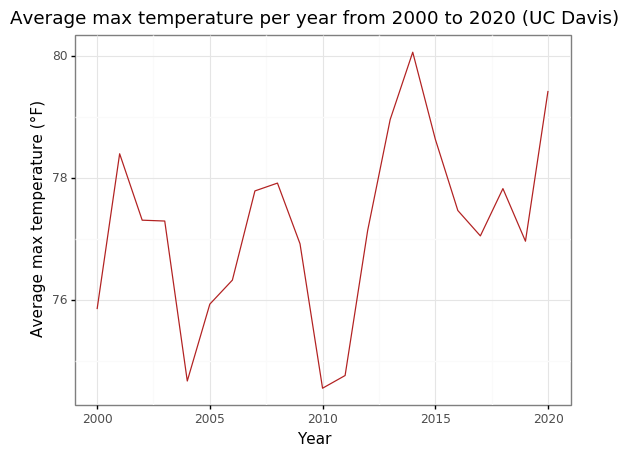

<ggplot: (-9223371890674643582)>

In [26]:
#plot for average maximum temperature per year from 2000 to 2020 for UC Davis
p9.ggplot(year_df_mean_davis) + p9.aes(x='year',y='TMAX',group = 1) + \
p9.geom_line(color='firebrick') + p9.themes.theme(axis_text_x=p9.element_text(angle=45)) + \
p9.labs(x = "Year", y = "Average max temperature (°F)", \
     title = "Average max temperature per year from 2000 to 2020 (UC Davis)") + p9.theme_bw()

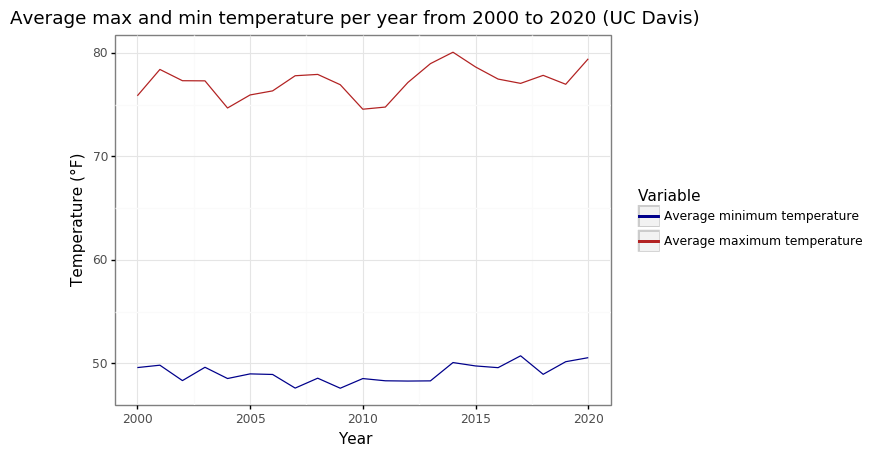

<ggplot: (-9223371890674455394)>

In [27]:
#lplot for avg max and min temperature per year from 2000 to 2020 for UC Davis
p9.ggplot(year_df_mean_davis, p9.aes(x='year',y='TMIN',group = 1)) + \
p9.geom_line(p9.aes(y='TMIN', color='"darkblue"')) +\
p9.geom_line(p9.aes(y='TMAX', color='"firebrick"')) +\
p9.scale_color_identity(guide='legend', name = "Variable", breaks=['darkblue', 'firebrick'], 
                        labels=['Average minimum temperature', 'Average maximum temperature']) +\
p9.themes.theme(axis_text_x=p9.element_text(angle=45)) +\
p9.labs(x = "Year", y = "Temperature (°F)", \
     title = "Average max and min temperature per year from 2000 to 2020 (UC Davis)") + p9.theme_bw()

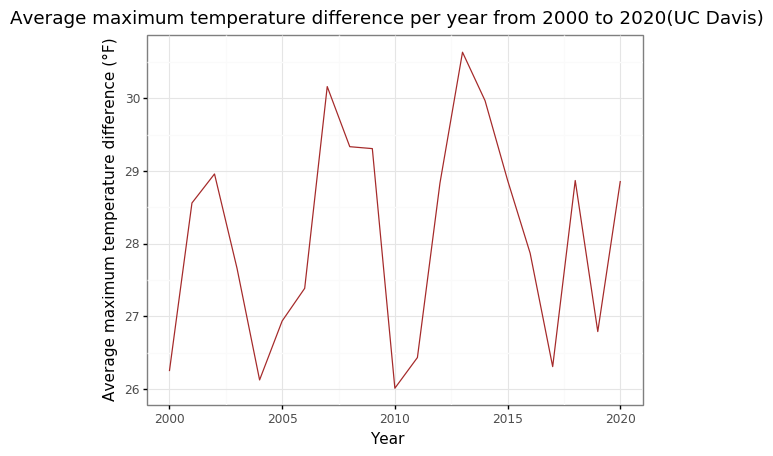

<ggplot: (-9223371890674229672)>

In [28]:
#plot for avg diff in max and min temperature per year from 2000 to 2020 for UC Davis
p9.ggplot(year_df_mean_davis) + p9.aes(x='year',y='diff',group = 1) + p9.geom_line(color='brown') +\
p9.themes.theme(axis_text_x=p9.element_text(angle=45)) + \
p9.labs(x = "Year", y = "Average maximum temperature difference (°F)", \
     title = "Average maximum temperature difference per year from 2000 to 2020(UC Davis)") + p9.theme_bw()